In [1]:
import os
os.chdir('../..')   # go to repo root
os.getcwd()


'/Users/shibinhoo/Documents/freiburg-cs/automlbenchmark'

In [2]:
import logging
logging.basicConfig(level=logging.INFO)


In [3]:
from dev.utils.dataset import TimeSeriesDatasetLoader
from dev.utils.constants import AUTOMLBENCHMARK_CONFIG_DIR

point_forecast_config = AUTOMLBENCHMARK_CONFIG_DIR / "point_forecast_skip_10000.yaml"
dataset_loader = TimeSeriesDatasetLoader(point_forecast_config)

dataset_loader.datasets_available

INFO:openml.config:No config file found at /Users/shibinhoo/.openml/config, using default configuration.
/Users/shibinhoo/miniconda3/envs/tabpfn-2/lib/python3.10/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


,num_series,num_timesteps,seasonality,forecast_horizon,frequency
car_parts,2674,104286,12,12,M
cif_2016,72,6244,12,12,M
covid_deaths,266,48412,7,30,D
electricity_hourly,321,8428176,24,48,H
electricity_weekly,321,47508,1,8,W
fred_md,107,76612,12,12,M
hospital,767,55224,12,12,M
kdd_cup_2018,270,2929404,24,48,H
m1_monthly,617,44892,12,18,M
m1_quarterly,203,8320,4,8,Q


In [4]:
train, test = dataset_loader.load_dataset("cif_2016")

INFO:dev.utils.dataset:Loading dataset cif_2016
/Users/shibinhoo/Documents/freiburg-cs/automlbenchmark/amlb/datasets/file.py:459: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = [Feature(i, col, to_feature_type(dtypes[i])) for i, col in enumerate(self._ds.columns)]


In [6]:
my_train = train.loc['0'].squeeze()
my_test = test.loc['0'].squeeze()

print(f"my_train: {my_train.shape}, my_test: {my_test.shape}")

my_train: (108,), my_test: (12,)


In [7]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# Modelling and Forecasting
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor



In [8]:
from tabpfn import TabPFNRegressor

forecaster_rf = ForecasterAutoreg(
    regressor=RandomForestRegressor(random_state=963),
    lags=12,
    differentiation=1,
)

forecaster_tabpfn = ForecasterAutoreg(
    regressor=TabPFNRegressor(),
    lags=12,
    differentiation=1,
)

print(f"Number of steps to forecast: {len(my_test)}")

forecaster_rf.fit(my_train)
pred_rf = forecaster_rf.predict(steps=len(my_test))

forecaster_tabpfn.fit(my_train)
pred_tabpfn = forecaster_tabpfn.predict(steps=len(my_test))

Number of steps to forecast: 12
Loading checkpoint from /Users/shibinhoo/miniconda3/envs/tabpfn-2/lib/python3.10/site-packages/tabpfn/model_cache/model_hans_regression.ckpt
Preprocessing config in new way
removed num_classes from differentiable_hyperparameters
Initializing Bar distribution
remove your triton_ln config, it is now parameter_free as default.
Initialized decoder for standard with (None, 5000)  and nout 5000
using feature positional embedding subspace
cancel nan borders


Training + Prediction Passes: 100%|██████████| 8/8 [00:05<00:00,  1.52batch/s]


Text(0.5, 0, '')

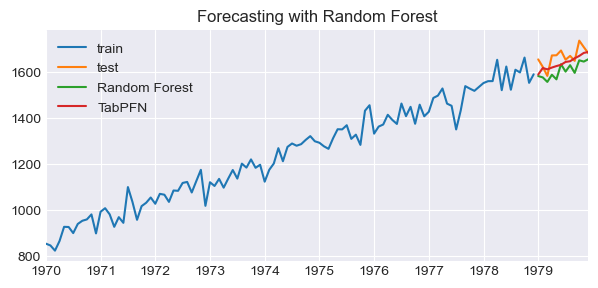

In [9]:
fig, ax = plt.subplots(figsize=(7, 3), sharex=True, sharey=True)
my_train.plot(ax=ax, label='train')
my_test.plot(ax=ax, label='test')
pred_rf.plot(ax=ax, label='Random Forest')
pred_tabpfn.plot(ax=ax, label='TabPFN')
ax.legend();
ax.set_title('Forecasting with Random Forest')
ax.set_xlabel('')